In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
from collections import defaultdict
from sklearn.metrics import adjusted_rand_score
from scipy.stats import rankdata
import itertools

In [3]:
from pygraphs.cluster import KernelKMeans, Ward, KernelKMeansSklearn, KernelWardSklearn
from pygraphs.graphs.generator import StochasticBlockModel, RubanovModel
from pygraphs.measure import *
from pygraphs.measure import H_kernels_plus_RSP_FE_SP_CT, scaler
from pygraphs.scenario import plot_results, d3_right_order, measures_right_order

In [4]:
best_params = defaultdict(dict)
best_params[(100, 4, 0.1)]["pWalk H"] = 0.00
best_params[(100, 4, 0.1)]["FE K"] = 0.93
best_params[(100, 4, 0.1)]["Comm H"] = 0.00
best_params[(100, 4, 0.1)]["logFor H"] = 0.53
best_params[(100, 4, 0.1)]["logComm H"] = 0.67
best_params[(100, 4, 0.1)]["Walk H"] = 0.53
best_params[(100, 4, 0.1)]["For H"] = 0.00
best_params[(100, 4, 0.1)]["SCT H"] = 0.90
best_params[(100, 4, 0.1)]["Heat H"] = 0.00
best_params[(100, 4, 0.1)]["logHeat H"] = 0.27
best_params[(100, 4, 0.1)]["SCCT H"] = 0.83
best_params[(100, 4, 0.1)]["SP-CT H"] = 0.27
best_params[(100, 4, 0.1)]["RSP K"] = 0.97
best_params[(100, 2, 0.1)]["pWalk H"] = 0.77
best_params[(100, 2, 0.1)]["FE K"] = 0.93
best_params[(100, 2, 0.1)]["Comm H"] = 0.33
best_params[(100, 2, 0.1)]["logFor H"] = 0.47
best_params[(100, 2, 0.1)]["logComm H"] = 0.57
best_params[(100, 2, 0.1)]["Walk H"] = 0.70
best_params[(100, 2, 0.1)]["For H"] = 0.97
best_params[(100, 2, 0.1)]["SCT H"] = 0.43
best_params[(100, 2, 0.1)]["Heat H"] = 0.87
best_params[(100, 2, 0.1)]["logHeat H"] = 0.47
best_params[(100, 2, 0.1)]["SCCT H"] = 0.99
best_params[(100, 2, 0.1)]["SP-CT H"] = 0.03
best_params[(100, 2, 0.1)]["RSP K"] = 0.97
best_params[(200, 2, 0.15)]["pWalk H"] = 0.83
best_params[(200, 2, 0.15)]["FE K"] = 0.87
best_params[(200, 2, 0.15)]["Comm H"] = 0.20
best_params[(200, 2, 0.15)]["logFor H"] = 0.23
best_params[(200, 2, 0.15)]["logComm H"] = 0.50
best_params[(200, 2, 0.15)]["Walk H"] = 0.57
best_params[(200, 2, 0.15)]["For H"] = 0.00
best_params[(200, 2, 0.15)]["SCT H"] = 0.47
best_params[(200, 2, 0.15)]["Heat H"] = 0.70
best_params[(200, 2, 0.15)]["logHeat H"] = 0.23
best_params[(200, 2, 0.15)]["SCCT H"] = 0.83
best_params[(200, 2, 0.15)]["SP-CT H"] = 0.03
best_params[(200, 2, 0.15)]["RSP K"] = 0.97
best_params[(200, 2, 0.1)]["pWalk H"] = 0.80
best_params[(200, 2, 0.1)]["FE K"] = 0.93
best_params[(200, 2, 0.1)]["Comm H"] = 0.23
best_params[(200, 2, 0.1)]["logFor H"] = 0.43
best_params[(200, 2, 0.1)]["logComm H"] = 0.47
best_params[(200, 2, 0.1)]["Walk H"] = 0.87
best_params[(200, 2, 0.1)]["For H"] = 0.93
best_params[(200, 2, 0.1)]["SCT H"] = 0.60
best_params[(200, 2, 0.1)]["Heat H"] = 0.57
best_params[(200, 2, 0.1)]["logHeat H"] = 0.57
best_params[(200, 2, 0.1)]["SCCT H"] = 0.03
best_params[(200, 2, 0.1)]["SP-CT H"] = 0.00
best_params[(200, 2, 0.1)]["RSP K"] = 0.97
best_params[(200, 4, 0.15)]["pWalk H"] = 0.00
best_params[(200, 4, 0.15)]["FE K"] = 0.87
best_params[(200, 4, 0.15)]["Comm H"] = 0.00
best_params[(200, 4, 0.15)]["logFor H"] = 0.17
best_params[(200, 4, 0.15)]["logComm H"] = 0.60
best_params[(200, 4, 0.15)]["Walk H"] = 0.70
best_params[(200, 4, 0.15)]["For H"] = 0.00
best_params[(200, 4, 0.15)]["SCT H"] = 0.00
best_params[(200, 4, 0.15)]["Heat H"] = 0.00
best_params[(200, 4, 0.15)]["logHeat H"] = 0.07
best_params[(200, 4, 0.15)]["SCCT H"] = 0.00
best_params[(200, 4, 0.15)]["SP-CT H"] = 0.03
best_params[(200, 4, 0.15)]["RSP K"] = 0.97
best_params[(100, 4, 0.15)]["pWalk H"] = 0.00
best_params[(100, 4, 0.15)]["FE K"] = 0.90
best_params[(100, 4, 0.15)]["Comm H"] = 0.00
best_params[(100, 4, 0.15)]["logFor H"] = 0.47
best_params[(100, 4, 0.15)]["logComm H"] = 0.63
best_params[(100, 4, 0.15)]["Walk H"] = 0.53
best_params[(100, 4, 0.15)]["For H"] = 0.00
best_params[(100, 4, 0.15)]["SCT H"] = 0.00
best_params[(100, 4, 0.15)]["Heat H"] = 0.00
best_params[(100, 4, 0.15)]["logHeat H"] = 0.07
best_params[(100, 4, 0.15)]["SCCT H"] = 0.00
best_params[(100, 4, 0.15)]["SP-CT H"] = 0.07
best_params[(100, 4, 0.15)]["RSP K"] = 0.93
best_params[(200, 4, 0.1)]["pWalk H"] = 0.83
best_params[(200, 4, 0.1)]["FE K"] = 0.90
best_params[(200, 4, 0.1)]["Comm H"] = 0.23
best_params[(200, 4, 0.1)]["logFor H"] = 0.37
best_params[(200, 4, 0.1)]["logComm H"] = 0.57
best_params[(200, 4, 0.1)]["Walk H"] = 0.60
best_params[(200, 4, 0.1)]["For H"] = 0.00
best_params[(200, 4, 0.1)]["SCT H"] = 0.43
best_params[(200, 4, 0.1)]["Heat H"] = 0.00
best_params[(200, 4, 0.1)]["logHeat H"] = 0.30
best_params[(200, 4, 0.1)]["SCCT H"] = 0.17
best_params[(200, 4, 0.1)]["SP-CT H"] = 0.07
best_params[(200, 4, 0.1)]["RSP K"] = 0.97
best_params[(100, 2, 0.15)]["pWalk H"] = 0.67
best_params[(100, 2, 0.15)]["FE K"] = 0.83
best_params[(100, 2, 0.15)]["Comm H"] = 0.27
best_params[(100, 2, 0.15)]["logFor H"] = 0.47
best_params[(100, 2, 0.15)]["logComm H"] = 0.70
best_params[(100, 2, 0.15)]["Walk H"] = 0.67
best_params[(100, 2, 0.15)]["For H"] = 0.83
best_params[(100, 2, 0.15)]["SCT H"] = 0.53
best_params[(100, 2, 0.15)]["Heat H"] = 0.83
best_params[(100, 2, 0.15)]["logHeat H"] = 0.23
best_params[(100, 2, 0.15)]["SCCT H"] = 0.90
best_params[(100, 2, 0.15)]["SP-CT H"] = 0.03
best_params[(100, 2, 0.15)]["RSP K"] = 0.97

In [5]:
best_params_100_2_01 = best_params[(100, 2, 0.1)]
best_params_100_2_01['SP K'] = 0
best_params_100_2_01['CT H'] = 0
best_params_100_2_01

{'pWalk H': 0.77,
 'FE K': 0.93,
 'Comm H': 0.33,
 'logFor H': 0.47,
 'logComm H': 0.57,
 'Walk H': 0.7,
 'For H': 0.97,
 'SCT H': 0.43,
 'Heat H': 0.87,
 'logHeat H': 0.47,
 'SCCT H': 0.99,
 'SP-CT H': 0.03,
 'RSP K': 0.97,
 'SP K': 0,
 'CT H': 0}

# Еще было бы интересно построить матрицу рановых корреляций мер по множеству случайных графов.
Тогда будет ясно, какие меры наиболее близки, какие далеки в смысле порядка. 


In [6]:
measure1_ari = np.array([95, 90, 87, 84, 75, 70, 61, 60, 58, 55])
measure2_ari = np.array([92, 94, 83, 79, 58, 61, 47, 72, 62, 68])

def ranking(measure1_ari, measure2_ari):
    assert measure1_ari.shape == measure2_ari.shape
    n = measure1_ari.shape[0]

    # 1. генерируем ранги
    measure1_rank = rankdata(-measure1_ari)
    measure2_rank = rankdata(-measure2_ari)

    # 2. Для каждой пары мер считаем сумму квадратов разностей
    sum_sq_delta = np.sum(np.power(measure1_rank - measure2_rank, 2))

    # 3. По формуле Спирмена считаем элементы матрицы корреляций
    return 1 - (6 * sum_sq_delta)/((n-1)*n*(n+1))

In [7]:
graphs, info = StochasticBlockModel(100, 2, p_in=0.3, p_out=0.1).generate_graphs(100)
clf = KernelWardSklearn(2)
results = defaultdict(list)
for kernel_class in tqdm(H_kernels_plus_RSP_FE_SP_CT):
    for edges, nodes in graphs:
        kernel = kernel_class(edges)
        param_flat = best_params_100_2_01[kernel.name]
        param = kernel.scaler.scale(param_flat)
        K = kernel.get_K(param)
        y_pred = clf.fit_predict(K)
        ari = adjusted_rand_score(nodes, y_pred)
        results[kernel.name].append(ari)

In [10]:
ranks = np.zeros((15, 15))
for i in range(15):
    for j in range(i, 15):
        ranks[i, j] = ranking(np.array(results[measures_right_order[i]]),
                              np.array(results[measures_right_order[j]]))

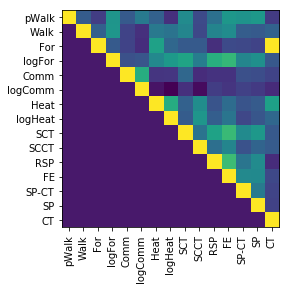

In [11]:
plt.imshow(ranks)
plt.xticks(range(15), [x[:-2] for x in measures_right_order], rotation='vertical')
plt.yticks(range(15), [x[:-2] for x in measures_right_order]);

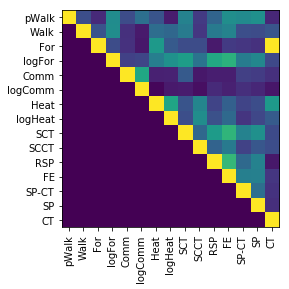

In [12]:
plt.imshow(np.abs(ranks))
plt.xticks(range(15), [x[:-2] for x in measures_right_order], rotation='vertical')
plt.yticks(range(15), [x[:-2] for x in measures_right_order]);

In [18]:
for i in range(15):
    print(' & '.join(["{:.2f}".format(x) for x in ranks[i]]))

1.00 & 0.24 & 0.12 & 0.49 & 0.23 & 0.37 & 0.26 & 0.08 & 0.44 & 0.17 & 0.32 & 0.49 & 0.48 & 0.50 & 0.11
0.00 & 1.00 & 0.25 & 0.49 & 0.14 & 0.07 & 0.36 & 0.33 & 0.42 & 0.16 & 0.41 & 0.45 & 0.24 & 0.23 & 0.26
0.00 & 0.00 & 1.00 & 0.23 & 0.14 & 0.07 & 0.54 & 0.28 & 0.23 & 0.23 & 0.07 & 0.17 & 0.16 & 0.14 & 1.00
0.00 & 0.00 & 0.00 & 1.00 & 0.19 & 0.21 & 0.43 & 0.51 & 0.56 & 0.38 & 0.60 & 0.64 & 0.42 & 0.46 & 0.22
0.00 & 0.00 & 0.00 & 0.00 & 1.00 & 0.60 & 0.09 & 0.10 & 0.28 & 0.06 & 0.08 & 0.09 & 0.19 & 0.18 & 0.14
0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 & -0.02 & -0.07 & 0.08 & -0.04 & 0.12 & 0.09 & 0.14 & 0.11 & 0.06
0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 & 0.59 & 0.26 & 0.45 & 0.20 & 0.31 & 0.21 & 0.24 & 0.54
0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 & 0.24 & 0.49 & 0.25 & 0.34 & 0.16 & 0.21 & 0.29
0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 & 0.33 & 0.55 & 0.65 & 0.44 & 0.50 & 0.23
0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 & 